In [18]:
# link do github: https://github.com/themestrre/Metodos-Numericos

# **Nome:** Carlos Eduardo Leite de Oliveira

# **Matricula:** 242104345

# **MÉTODOS NUMÉRICOS EM CIÊNCIAS MECÂNICAS**

import numpy as np
import matplotlib.pyplot as plt

#  Função contínua e monotônica

In [19]:
# Função objetivo e derivadas

def f(x, y):
    return 5*x - 3*y + 2*x**2 - x**4 + x*y - y**2

# Gradiente
def grad_f(x, y):
    fx = 5 + 4*x - 4*x**3 + y
    fy = -3 + x - 2*y
    return np.array([fx, fy])

# Hessiana
def hess_f(x, y):
    fxx = 4 - 12*x**2
    fxy = 1
    fyx = 1
    fyy = -2
    return np.array([[fxx, fxy],
                     [fyx, fyy]])

# Método do Aclive Máximo

In [20]:
# Gradiente com busca de passo por varredura

def metodo_aclive_maximo():

    trajetoria = []

    def busca_alpha(x, y, fx, fy):
        a_min, a_max, passo = 0.0, 1.0, 0.001
        alpha_otimo = 0.0
        fmax = -1e30
        alpha = a_min
        while alpha <= a_max:
            fval = f(x + alpha*fx, y + alpha*fy)
            if fval > fmax:
                fmax = fval
                alpha_otimo = alpha
            alpha += passo
        return alpha_otimo

    max_iter = 100
    tol = 1e-8
    x, y = -1.0, -1.5

    for k in range(1, max_iter + 1):

        fx = 5 + 4*x - 4*x**3 + y
        fy = -3 + x - 2*y

        grad_norm = np.sqrt(fx**2 + fy**2)
        trajetoria.append([x, y])

        if grad_norm < tol:
            break

        alpha = busca_alpha(x, y, fx, fy)

        x_new = x + alpha * fx
        y_new = y + alpha * fy

        if abs(x_new - x) < tol and abs(y_new - y) < tol:
            x, y = x_new, y_new
            trajetoria.append([x, y])
            break

        x, y = x_new, y_new

    return np.array([x, y]), f(x, y), k, np.array(trajetoria)


# Método de Gradientes conjugados (método de Fletcher-Reeves)

In [21]:
# Gradiente Conjugado

def metodo_gradiente_conjugado():

    def gradiente(x, y):
        fx = 5 + 4*x - 4*x**3 + y
        fy = -3 + x - 2*y
        return fx, fy

    def derivada_f_alpha(x, y, dx, dy, alpha):
        xp = x + alpha*dx
        yp = y + alpha*dy
        fxp, fyp = gradiente(xp, yp)
        return fxp*dx + fyp*dy

    def derivada_segunda_f_alpha(x, y, dx, dy, alpha):
        xp = x + alpha*dx
        yp = y + alpha*dy
        dxx = 4 - 12*xp**2
        dxy = 1
        dyy = -2
        return dx*dx*dxx + 2*dx*dy*dxy + dy*dy*dyy

    def busca_alpha(x, y, dx, dy):
        alpha = 0.0
        eps = 1e-8
        for _ in range(50):
            df = derivada_f_alpha(x, y, dx, dy, alpha)
            d2f = derivada_segunda_f_alpha(x, y, dx, dy, alpha)
            if abs(df) < eps:
                break
            alpha_new = alpha - df / d2f
            if abs(alpha_new - alpha) < eps:
                alpha = alpha_new
                break
            alpha = alpha_new
        return alpha

    max_iter = 100
    tol = 1e-6
    x, y = 0.0, 0.0
    fx, fy = gradiente(x, y)

    dx = -fx
    dy = -fy
    g2_old = fx*fx + fy*fy

    for k in range(1, max_iter + 1):

        alpha = busca_alpha(x, y, dx, dy)
        x += alpha * dx
        y += alpha * dy

        fx, fy = gradiente(x, y)
        g2_new = fx*fx + fy*fy

        if np.sqrt(g2_new) < tol:
            break

        beta = g2_new / g2_old
        dx = -fx + beta * dx
        dy = -fy + beta * dy
        g2_old = g2_new

    return np.array([x, y]), f(x, y), k

# Método de Newton

In [22]:
# Newton Multivariado

def metodo_newton():
    tol = 1e-6
    max_iter = 50
    x = np.array([0.0, 0.0])

    for k in range(1, max_iter + 1):
        g = grad_f(x[0], x[1])
        H = hess_f(x[0], x[1])
        if np.linalg.norm(g) < tol:
            break
        try:
            s = np.linalg.solve(H, g)
        except:
            break
        x = x - s

    return x, f(x[0], x[1]), k

# Método de Levenberg-Marquardt

In [23]:
# Levenberg–Marquardt

def metodo_levenberg_marquardt():
    max_iter = 100
    tol = 1e-8
    x = np.array([0.0, 0.0])

    alpha = 1.0
    beta_up = 10.0
    beta_down = 0.1

    for k in range(1, max_iter + 1):

        g = grad_f(x[0], x[1])
        if np.linalg.norm(g) < tol:
            break

        H = hess_f(x[0], x[1])
        f_curr = f(x[0], x[1])

        for _ in range(20):
            H_mod = H + alpha * np.eye(2)
            try:
                s = np.linalg.solve(H_mod, g)
            except:
                alpha *= beta_up
                continue

            x_trial = x + s
            f_trial = f(x_trial[0], x_trial[1])

            if f_trial > f_curr:
                x = x_trial
                alpha = max(alpha * beta_down, 1e-12)
                break
            else:
                alpha *= beta_up

        if np.linalg.norm(s) < tol:
            break

    return x, f(x[0], x[1]), k

# Geração de Resultados

In [24]:
# Resultados numéricos e comparação de resultados

if __name__ == "__main__":

    res1, f1, it1, traj = metodo_aclive_maximo()
    res2, f2, it2 = metodo_gradiente_conjugado()
    res3, f3, it3 = metodo_newton()
    res4, f4, it4 = metodo_levenberg_marquardt()

    print("\n=========== COMPARAÇÃO FINAL ===========")
    print(f"\nAclive Máximo: Ponto={res1}, f={f1}, iterações={it1}")
    print(f"Gradiente Conjugado: Ponto={res2}, f={f2}, iterações={it2}")
    print(f"Newton:              Ponto={res3}, f={f3}, iterações={it3}")
    print(f"Levenberg-Marquardt: Ponto={res4}, f={f4}, iterações={it4}")


=========== COMPARAÇÃO FINAL ===========

Aclive Máximo: Ponto=[ 1.33443229 -0.83278391], f=7.756183018618837, iterações=31
Gradiente Conjugado: Ponto=[ 1.33443233 -0.8327833 ], f=7.756183018618541, iterações=100
Newton:              Ponto=[ 1.33443231 -0.83278384], f=7.756183018618836, iterações=18
Levenberg-Marquardt: Ponto=[ 1.33434593 -0.83180999], f=7.756181921344063, iterações=100


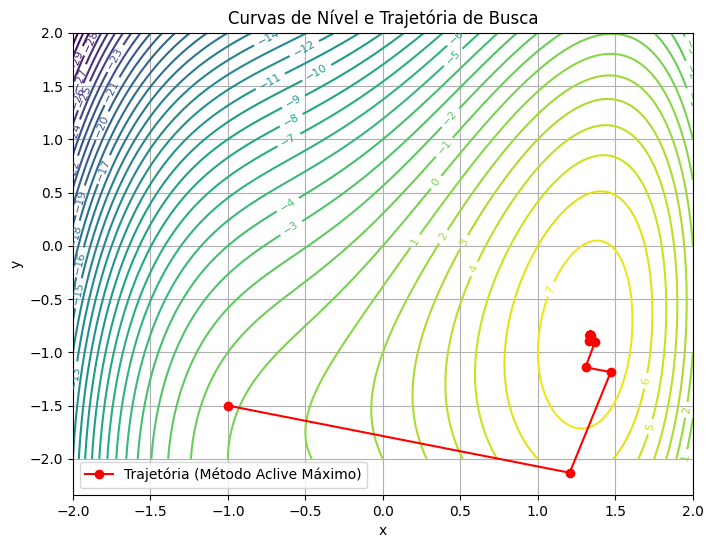

In [25]:

    # Gráfico da Trajetória

    x_traj = traj[:,0]
    y_traj = traj[:,1]

    grid = np.linspace(-2, 2, 400)
    X, Y = np.meshgrid(grid, grid)
    Z = f(X, Y)

    plt.figure(figsize=(8,6))
    cs = plt.contour(X, Y, Z, levels=40, cmap='viridis')
    plt.clabel(cs, inline=True, fontsize=8)
    plt.plot(x_traj, y_traj, 'r-o', label="Trajetória (Método Aclive Máximo)")
    plt.title("Curvas de Nível e Trajetória de Busca")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()
